<a href="https://colab.research.google.com/github/BossOfTheCode/ml/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

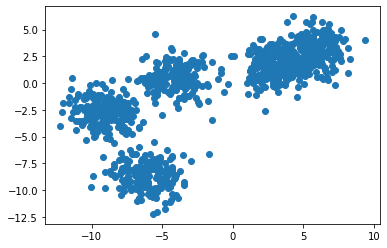

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [2]:
def kmeans_with_plots(X, K, eps, n_iter):
  output = {}
  #Размерность матрицы
  m = X.shape[0]
  n = X.shape[1]
  #Массив для хранения центроид
  centroids = np.array([]).reshape(n,0)
  for i in range(K):
      #Берем k случайных центров
      rand = random.randint(0,m-1)
      centroids = np.c_[centroids, X[rand]] 
  for i in range(n_iter):  
      #Массив для хранения расстояний 
      distance = np.array([]).reshape(m,0)
      for k in range(K):
          #Определяем расстояние до каждой центроиды
          tempDist = np.sum((X - centroids[:,k])**2, axis=1)
          distance = np.c_[distance,tempDist]
      #Сохраняем минимальные расстояния
      min = np.argmin(distance, axis=1)+1
      clusters = {}
      for k in range(K):
          clusters[k+1] = np.array([]).reshape(2,0)
      #Присваиваем точки кластерам
      for i in range(m):
          clusters[min[i]] = np.c_[clusters[min[i]],X[i]]
      #Визуализируем сходимость кластеров
      plt.figure()
      for k in range(K):
          clusters[k+1] = clusters[k+1].T
          plt.scatter(clusters[k+1][:,0],clusters[k+1][:,1])
      plt.scatter(centroids[0,:],centroids[1,:],s=300,c='black')
      old_centroids = centroids.copy()
      #Пересчитываем центроиды
      for k in range(K):
          centroids[:,k] = np.mean(clusters[k+1],axis=0)
      output = clusters
      #Завершаем цикл, если точки перестают присваиваться другим кластерам
      if (abs(centroids - old_centroids < eps).all()):
        break
  return output, centroids

In [3]:
def kmeans(X, K, eps, n_iter):
  output = {}
  #Размерность матрицы
  m = X.shape[0]
  n = X.shape[1]
  #Массив для хранения центроид
  centroids = np.array([]).reshape(n,0)
  for i in range(K):
      #Берем k случайных центров
      rand = random.randint(0,m-1)
      centroids = np.c_[centroids, X[rand]] 
  for i in range(n_iter):  
      #Массив для хранения расстояний 
      distance = np.array([]).reshape(m,0)
      for k in range(K):
          #Определяем расстояние до каждой центроиды
          tempDist = np.sum((X - centroids[:,k])**2, axis=1)
          distance = np.c_[distance,tempDist]
      #Сохраняем минимальные расстояния
      min = np.argmin(distance, axis=1)+1
      clusters = {}
      for k in range(K):
          clusters[k+1] = np.array([]).reshape(2,0)
      #Присваиваем точки кластерам
      for i in range(m):
          clusters[min[i]] = np.c_[clusters[min[i]],X[i]]
      for k in range(K):
          clusters[k+1] = clusters[k+1].T
      old_centroids = centroids.copy()
      #Пересчитываем центроиды
      for k in range(K):
          centroids[:,k] = np.mean(clusters[k+1],axis=0)
      output = clusters
      #Завершаем цикл, если точки перестают присваиваться другим кластерам
      if (abs(centroids - old_centroids < eps).all()):
        break
  return output, centroids

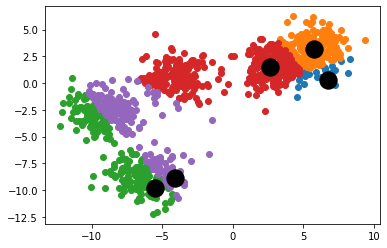

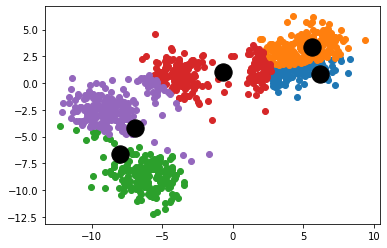

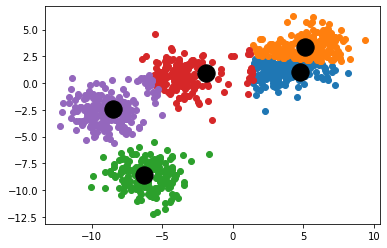

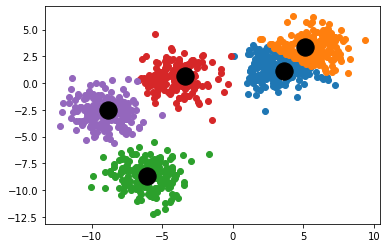

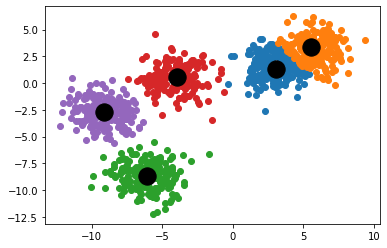

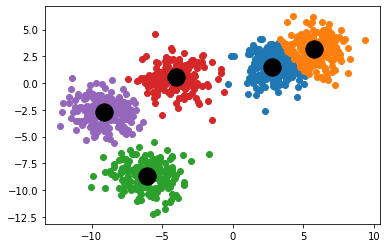

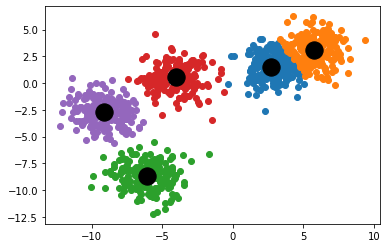

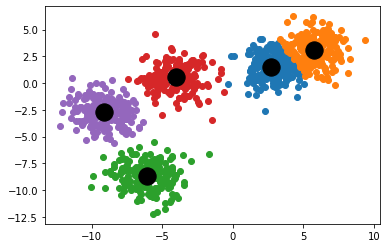

In [4]:
clusters, centroids = kmeans_with_plots(X, 5, 0.001, 100)

In [5]:
SSE_array=np.array([])
for K in range(1,11):
    clusters, centroids=kmeans(X, K, 0.001, 100)
    SSE=0
    for k in range(K):
        SSE+=np.sum((clusters[k+1]-centroids.T[k,:])**2)
    SSE_array=np.append(SSE_array,SSE)

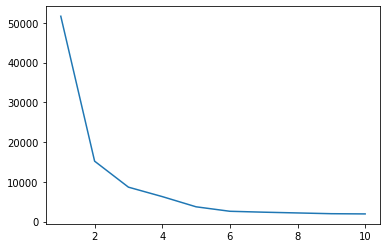

In [6]:
K_array=np.arange(1,11,1)
plt.plot(K_array,SSE_array)
plt.show()

# Задание 2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/2.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35019 entries, 0 to 61065
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Марка         35019 non-null  object 
 1   Год           35019 non-null  float64
 2   Состояние     35019 non-null  object 
 3   Пробег        35019 non-null  float64
 4   Объем         35019 non-null  float64
 5   Топливо       35019 non-null  object 
 6   Мощность      35019 non-null  float64
 7   Кузов         35019 non-null  object 
 8   Привод        35019 non-null  object 
 9   КПП           35019 non-null  object 
 10  Руль          35019 non-null  object 
 11  Хозяев в ПТС  35019 non-null  object 
 12  Цена          35019 non-null  float64
dtypes: float64(5), object(8)
memory usage: 3.7+ MB


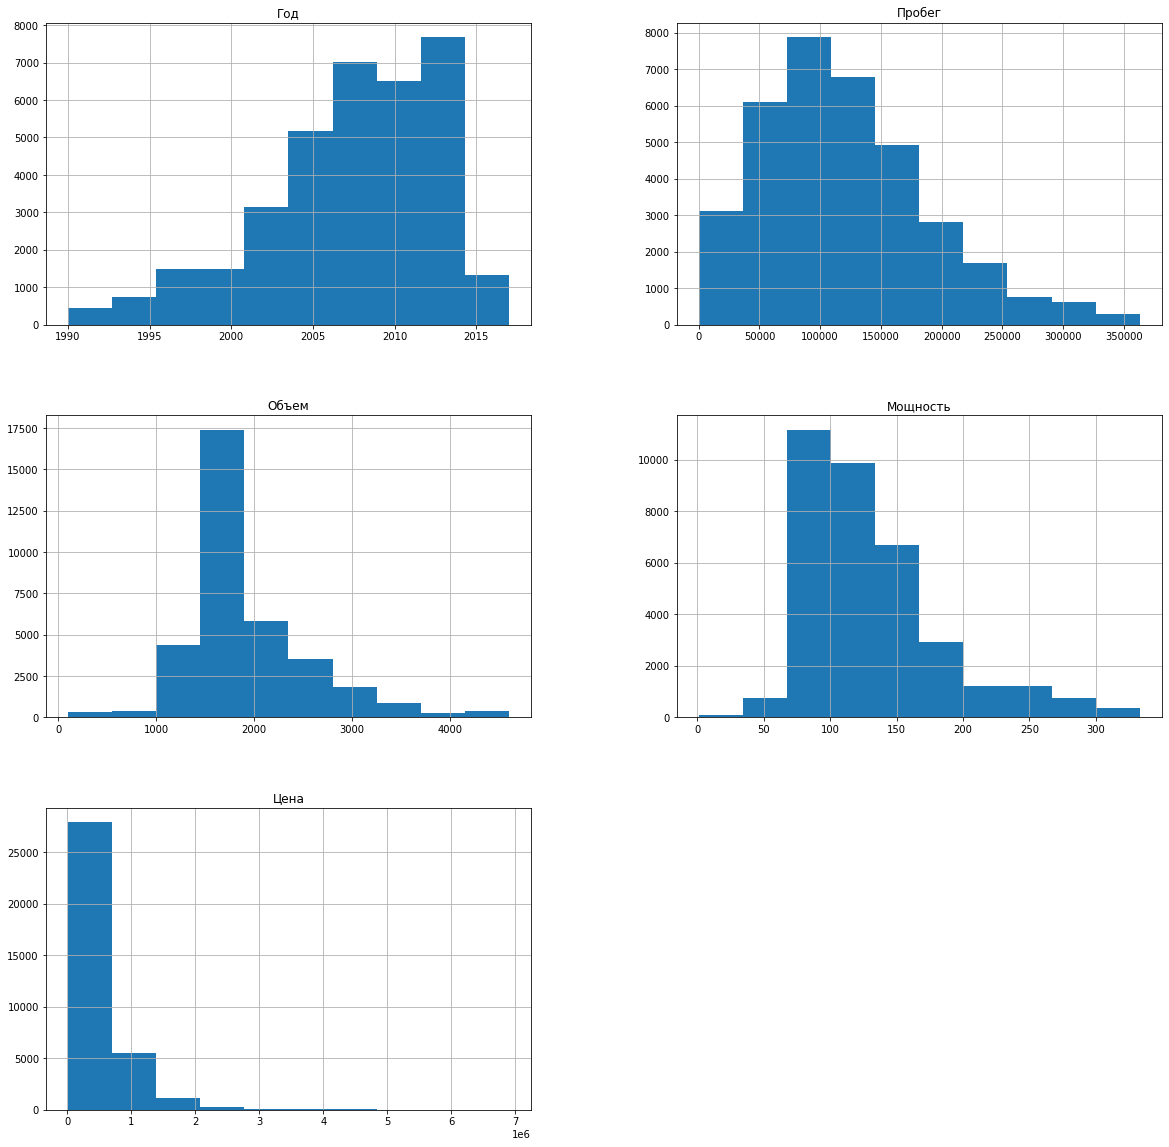

In [9]:
hist = df.hist(figsize=(20,20))

In [10]:
df['Марка'].unique()

array(['Volkswagen', 'Skoda', 'Renault', 'Nissan', 'УАЗ', 'Opel', 'BMW',
       'Ford', 'Hyundai', 'Honda', 'Volvo', 'Mitsubishi', 'ВАЗ', 'Fiat',
       'Toyota', 'Audi', 'Kia', 'ЗАЗ', 'Land Rover', 'ГАЗ',
       'Mercedes-Benz', 'Subaru', 'Chevrolet', 'Chrysler', 'Daihatsu',
       'Daewoo', 'Mazda', 'Jaguar', 'SsangYong', 'Suzuki', 'Dodge',
       'Hafei', 'Chery', 'FAW', 'Citroen', 'Lexus', 'Datsun', 'SEAT',
       'Lifan', 'BYD', 'ТагАЗ', 'Great Wall', 'Peugeot', 'ИЖ', 'Infiniti',
       'Jeep', 'Cadillac', 'Iran Khodro', 'Lincoln', 'Mini', 'Hummer',
       'Smart', 'Pontiac', 'Changan', 'Geely', 'Porsche', 'Rover',
       'Isuzu', 'Saturn', 'Dacia', 'DongFeng', 'Haima', 'Saab', 'Богдан',
       'Alfa Romeo', 'Renault Samsung', 'Москвич', 'JAC', 'Haval', 'ЛуАЗ',
       'Derways', 'Brilliance', 'Hawtai', 'Acura', 'ZX', 'Ravon',
       'Tianye', 'Doninvest', 'Foton', 'Mercury', 'Самоделка', 'Luxgen',
       'Buick', 'Oldsmobile', 'Lancia', 'IKCO', 'Samand', 'СМЗ (СеАЗ)',
       'Tian

In [11]:
df['Марка'] = df['Марка'].replace(['Volkswagen', 'BMW', 'Opel', 'Audi', 'Mercedes-Benz', 'Smart', 'Porsche'], 'Немецкие')
df['Марка'] = df['Марка'].replace(['Skoda'], 'Чешские')
df['Марка'] = df['Марка'].replace(['Renault', 'Citroen', 'Peugeot'], 'Французские')
df['Марка'] = df['Марка'].replace(['Nissan', 'Honda', 'Mitsubishi', 'Toyota', 'Subaru', 'Daihatsu', 'Mazda', 'Suzuki', 'Lexus', 'Datsun', 'Infiniti', 'Isuzu', 'Acura', 'Scion'], 'Японские')
df['Марка'] = df['Марка'].replace(['УАЗ', 'ВАЗ', 'ЗАЗ', 'ГАЗ', 'ТагАЗ', 'ИЖ', 'Богдан', 'Москвич', 'ЛуАЗ', 'Derways', 'Ravon', 'Doninvest', 'Самоделка', 'СМЗ (СеАЗ)', 'ВИС'], 'СНГ')
df['Марка'] = df['Марка'].replace(['Ford', 'Chevrolet', 'Chrysler', 'Dodge', 'Jeep', 'Cadillac', 'Lincoln', 'Hummer', 'Pontiac', 'Saturn', 'Mercury', 'Buick', 'Oldsmobile', 'GMC'], 'Американские')
df['Марка'] = df['Марка'].replace(['Volvo', 'Saab'], 'Шведские')
df['Марка'] = df['Марка'].replace(['Fiat', 'Alfa Romeo', 'Lancia'], 'Итальянские')
df['Марка'] = df['Марка'].replace(['Hyundai', 'Kia', 'Daewoo', 'SsangYong', 'Renault Samsung'], 'Корейские')
df['Марка'] = df['Марка'].replace(['Land Rover', 'Jaguar', 'Mini', 'Rover'], 'Английские')
df['Марка'] = df['Марка'].replace(['Hafei', 'Chery', 'FAW', 'Lifan', 'BYD', 'Great Wall', 'Changan', 'Geely', 'DongFeng', 'Haima', 'JAC', 'Haval', 'Brilliance', 'Hawtai', 'ZX', 'Tianye', 'Foton', 'Luxgen', 'Tianma'], 'Китайские')
df['Марка'] = df['Марка'].replace(['SEAT'], 'Испанские')
df['Марка'] = df['Марка'].replace(['Iran Khodro', 'IKCO', 'Samand'], 'Иранские')
df['Марка'] = df['Марка'].replace(['Dacia'], 'Румынские')


In [12]:
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Немецкие,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Чешские,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Французские,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Японские,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,СНГ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

numeric_df = df.select_dtypes(exclude="object").columns
categorial_df = df.select_dtypes(include="object").columns

In [14]:
ct = ColumnTransformer(transformers=[ 
        ('num', StandardScaler(), numeric_df),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorial_df)])

In [15]:
prep_data = ct.fit_transform(df).toarray()

In [20]:
km = KMeans(n_clusters=8)
clusters = km.fit_predict(prep_data)
df['cluster'] = clusters

In [21]:
prep_df = df.copy(deep=True)
labels = []
for feature in categorial_df:
  le = LabelEncoder()
  prep_df[feature] = le.fit_transform(df[feature])
  labels.append({i : f for i, f in enumerate(le.classes_.tolist())})

In [22]:
result = prep_df.groupby(by="cluster").median()
for feature, dictionary in zip(categorial_df, labels):
    result[feature] = result[feature].map(dictionary)

In [23]:
result

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
cluster,,,,,,,,,,,,,
0,Японские,1999.0,БУ,241000.0,1800.0,бензин,120.0,седан,передний,автомат,правый,3 и более,190000.0
1,Немецкие,2012.0,БУ,67000.0,2000.0,бензин,156.0,кроссовер,полный,автомат,левый,1 владелец,999000.0
2,Немецкие,2012.0,БУ,68000.0,1600.0,бензин,107.0,седан,передний,механика,левый,1 владелец,450000.0
3,СНГ,2007.0,БУ,140000.0,1600.0,бензин,95.0,седан,передний,механика,левый,3 и более,220000.0
4,Немецкие,2007.0,БУ,150500.0,3500.0,бензин,249.0,кроссовер,полный,автомат,левый,2 владельца,767000.0
5,СНГ,2007.0,БУ,143680.0,2200.0,бензин,152.0,пикап,передний,автомат,левый,2 владельца,520000.0
6,СНГ,2000.0,БУ,93000.0,1600.0,бензин,79.0,седан,передний,механика,левый,3 и более,68000.0
7,Немецкие,2013.0,БУ,62000.0,3000.0,дизель,249.0,кроссовер,полный,автомат,левый,1 владелец,2100000.0


1 кластер - дешевые японские праворульные авто с КПП автомат и очень большим пробегом

2 кластер - средние по стоимости немецкие леворульные авто с КПП автомат и небольшим пробегом

3 кластер - дешевые немецкие леворульные авто с механической КПП и небольшим пробегом

4 кластер - дешевые отечественные леворульные авто с механической КПП и большим пробегом

5 кластер - средние по стоимости немецкие леворульные авто с КПП автомат и большим пробегом

6 кластер - дорогие (по меркам отечественных) авто с КПП автомат и большим пробегом

7 кластер - очень дешевые отечественные авто с механической КПП и средним пробегом

8 кластер - дорогие немецкие леворульные авто с КПП автомат и небольшим пробегом